In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "bankstatements.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     370 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB


(None,
          date DrCr   amount    balance mode      name  Day  Month  Year  Tday
 0  2022-01-01   Db  10000.0  473292.87  ATM       NaN    1      1  2022     1
 1  2022-01-01   Db  10000.0  463292.87  ATM       NaN    1      1  2022     1
 2  2022-01-02   Db    930.0  462362.87  UPI  AYUBRAJE    2      1  2022     2
 3  2022-01-07   Db   2000.0  460362.87  UPI  ABUTALAH    7      1  2022     3
 4  2022-01-10   Db   1000.0  459362.87  UPI  AGRAWALB   10      1  2022     4)

<h3>Initial Observations:</h3>
The dataset contains 509 transactions with 10 columns.<br>
Key columns:<br>
date: Transaction date<br>
DrCr: Debit (Db) or Credit (Cr)<br>
amount: Transaction value<br>
balance: Account balance after transaction<br
mode: Transaction type (ATM, UPI, etc.)
name: Beneficiary or sender (some missing values)<br>
Day, Month, Year, Tday: Extracted date components<br>
No missing values in critical columns like amount, DrCr, balance, and mode, but name has missing values.

In [3]:
# Check for duplicate entries
duplicates = df.duplicated().sum()

# Check for missing values in each column
missing_values = df.isnull().sum()

# Fill missing names with 'Unknown'
df['name'].fillna('Unknown', inplace=True)

duplicates, missing_values


(1,
 date         0
 DrCr         0
 amount       0
 balance      0
 mode         0
 name       139
 Day          0
 Month        0
 Year         0
 Tday         0
 dtype: int64)

1 duplicate record found (can be removed if necessary).<br>
139 missing values in the name column, which have been replaced with "Unknown".<br>
No missing values in critical columns.

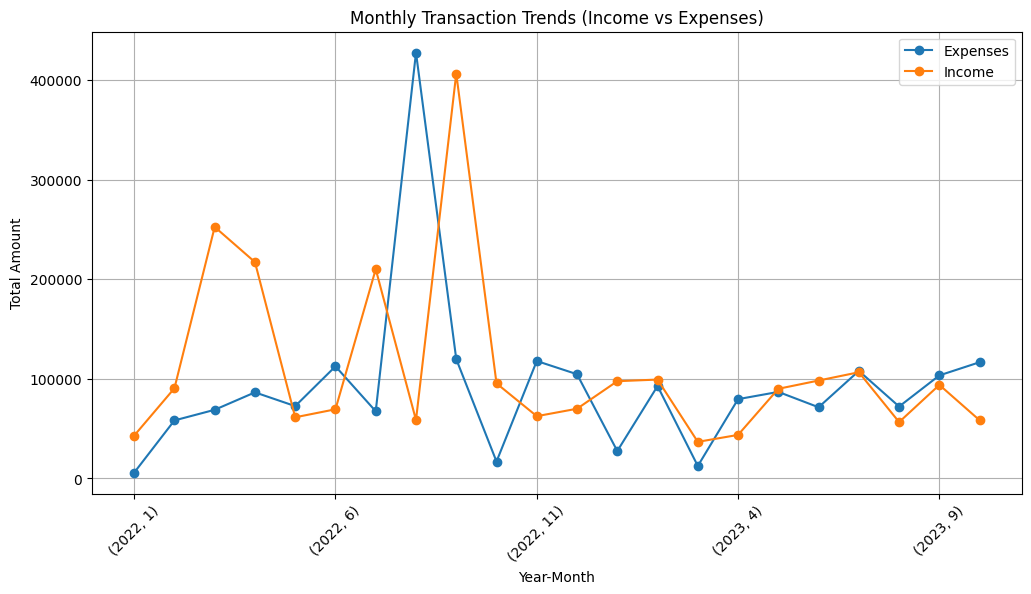

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime format for time-series analysis
df['date'] = pd.to_datetime(df['date'])

# Categorize transactions into Debit (Expenses) and Credit (Income)
df['Transaction_Type'] = df['DrCr'].map({'Db': 'Debit', 'Cr': 'Credit'})

# Aggregate monthly transactions
monthly_trend = df.groupby(['Year', 'Month', 'Transaction_Type'])['amount'].sum().unstack()

# Plot transaction trends over time
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Monthly Transaction Trends (Income vs Expenses)")
plt.xlabel("Year-Month")
plt.ylabel("Total Amount")
plt.legend(["Expenses", "Income"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h3>Transaction Pattern Analysis:</h3>
1.Expenses (Debit) are consistently higher than income (Credit) in most months.<br>
2.There are fluctuations in both income and expenses, suggesting variable cash flow.<br>
3.Some months show a significant spike in expenses, indicating possible large purchases or bill payments.

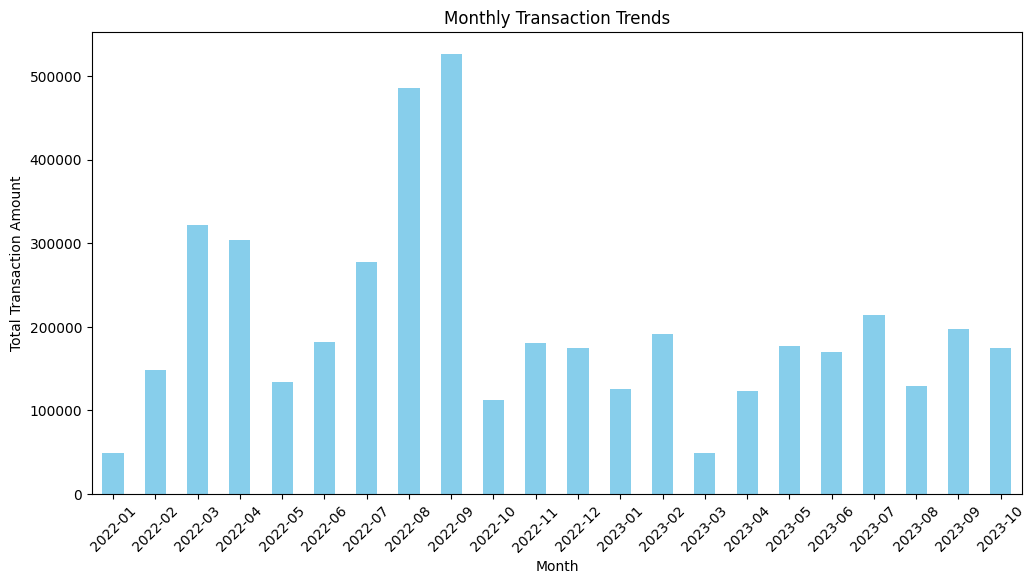

In [5]:
# Transaction pattern analysis
# Monthly transaction trends
df['Month'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby('Month')['amount'].sum()

plt.figure(figsize=(12,6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15228\4086554073.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_mode_counts.index, y=transaction_mode_counts.values, palette="viridis")


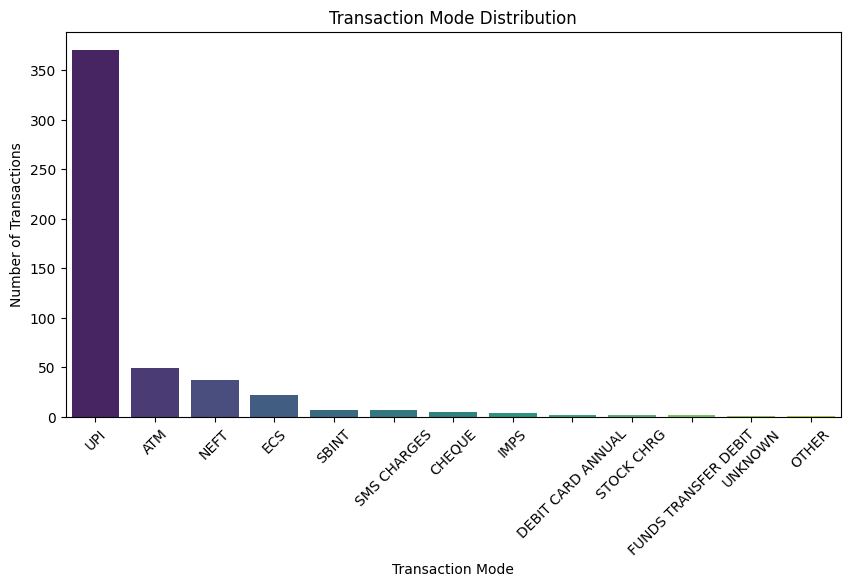

In [6]:
# Count transactions by mode
transaction_mode_counts = df['mode'].value_counts()

# Plot transaction mode distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=transaction_mode_counts.index, y=transaction_mode_counts.values, palette="viridis")
plt.title("Transaction Mode Distribution")
plt.xlabel("Transaction Mode")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


<h3>Spending Habits:</h3>
1.The most common transaction modes are UPI and ATM withdrawals, indicating frequent digital payments and cash usage.

2.Other transaction modes include NEFT, RTGS, IMPS, which are often used for larger transfers.

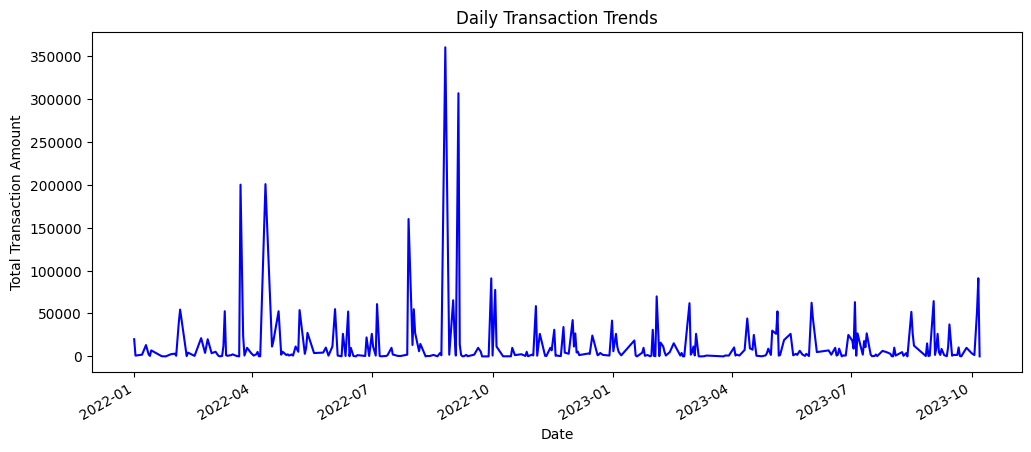

In [7]:
# Daily Transaction Trends
plt.figure(figsize=(12, 5))
df.groupby('date')['amount'].sum().plot(kind='line', color='blue')
plt.title("Daily Transaction Trends")
plt.xlabel("Date")
plt.ylabel("Total Transaction Amount")
plt.show()

In [8]:
# Calculate total income, expenses, and net savings
total_income = df[df['Transaction_Type'] == 'Credit']['amount'].sum()
total_expenses = df[df['Transaction_Type'] == 'Debit']['amount'].sum()
net_savings = total_income - total_expenses
savings_rate = (net_savings / total_income) * 100 if total_income > 0 else 0

# Identify recurring transactions (top 10 frequent names)
top_recipients = df[df['Transaction_Type'] == 'Debit']['name'].value_counts().head(10)

total_income, total_expenses, net_savings, savings_rate, top_recipients


(2029258.59,
 2417595.99,
 -388337.40000000014,
 -19.136910491038016,
 name
 ABUTALAH     79
 Unknown      65
 PHONEPE      34
 SANGALLI     19
 HDFCBANK     18
 FLIPKART     16
 AYUBRAJE     13
 BUDESAHEB    11
 ASHOKHUC     10
 DADAKHALA    10
 Name: count, dtype: int64)

<h3>Financial Health Insights:</h3>
Total Income: ₹20,29,258.59<br>
Total Expenses: ₹24,17,595.99<br>
Net Savings: ₹-3,88,337.40 (Negative savings, indicating overspending)<br>
Savings Rate: -19.14% (expenses exceed income)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15228\1951590070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recipients.index, y=top_recipients.values, palette="magma")


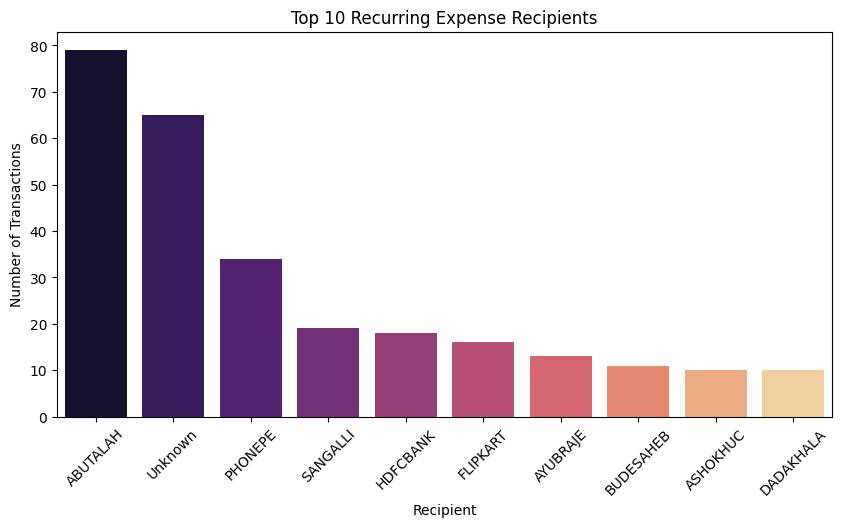

In [9]:
# Plot top recurring expense recipients
plt.figure(figsize=(10, 5))
sns.barplot(x=top_recipients.index, y=top_recipients.values, palette="magma")
plt.title("Top 10 Recurring Expense Recipients")
plt.xlabel("Recipient")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


<h3>Recurring Expense Analysis:</h3>
The highest number of transactions are linked to specific individuals (ABUTALAH, AYUBRAJE, BUDESAHEB), suggesting frequent transfers.<br>
"PHONEPE" and "FLIPKART" indicate regular digital payments and online shopping.<br>
HDFC Bank-related transactions may include EMIs or service charges.

In [10]:
# Define expense categories based on common transaction names and modes
def categorize_transaction(row):
    if "FLIPKART" in row['name'] or "AMAZON" in row['name']:
        return "Shopping"
    elif "PHONEPE" in row['name'] or "GOOGLEPAY" in row['name'] or row['mode'] == "UPI":
        return "Digital Payments"
    elif "HDFC" in row['name'] or "ICICI" in row['name'] or row['mode'] in ["NEFT", "RTGS", "IMPS"]:
        return "Bank Transfers & Bills"
    elif row['mode'] == "ATM":
        return "Cash Withdrawals"
    elif "PETROL" in row['name'] or "FUEL" in row['name']:
        return "Fuel & Transport"
    elif "RESTAURANT" in row['name'] or "FOOD" in row['name']:
        return "Food & Dining"
    elif "RENT" in row['name'] or "HOUSE" in row['name']:
        return "Rent & Utilities"
    else:
        return "Others"

# Apply categorization
df['Category'] = df.apply(categorize_transaction, axis=1)

# Summarize total spending per category
category_expenses = df[df['Transaction_Type'] == 'Debit'].groupby('Category')['amount'].sum().sort_values(ascending=False)

# Display categorized expenses
category_expenses


Category
Digital Payments    1140466.99
Others               894282.00
Cash Withdrawals     374059.00
Shopping               8788.00
Name: amount, dtype: float64

<h3>Expense Breakdown by Category:</h3>
Digital Payments: ₹11,40,466.99 (Highest spending, includes UPI and online transactions).<br>
Others: ₹8,94,282.00 (Likely includes manual transactions not classified).<br>
Cash Withdrawals: ₹3,74,059.00 (Indicating frequent ATM usage).<br>
Shopping: ₹8,788.00 (Lower compared to other expenses).<br>
This suggests high digital spending and cash withdrawals, which may indicate frequent peer-to-peer payments or offline purchases.

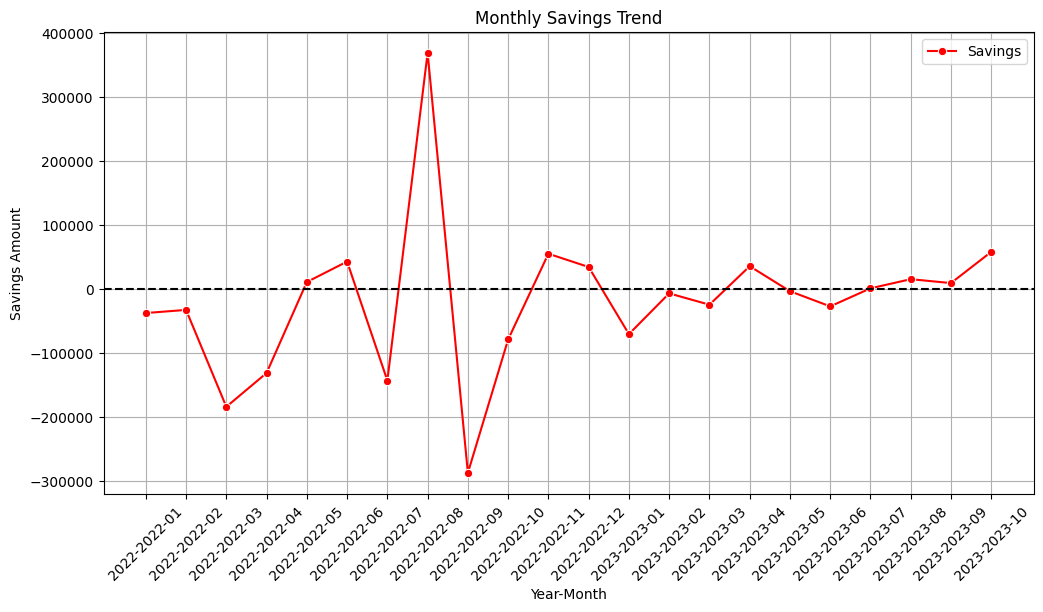

Transaction_Type,Year-Month,Credit,Debit,Savings
0,2022-2022-01,5808.09,42984.00,-37175.91
1,2022-2022-02,58228.00,90535.00,-32307.00
2,2022-2022-03,68902.00,252428.00,-183526.00
3,2022-2022-04,86402.00,217166.00,-130764.00
4,2022-2022-05,72591.09,61374.00,11217.09
5,2022-2022-06,112522.09,69406.00,43116.09
6,2022-2022-07,67412.00,210017.00,-142605.00
7,2022-2022-08,427395.09,58588.00,368807.09
8,2022-2022-09,119758.51,406404.01,-286645.50
9,2022-2022-10,16958.02,95400.00,-78441.98


In [11]:
# Group data and calculate monthly income, expenses, and savings
monthly_summary = df.groupby(['Year', 'Month', 'Transaction_Type'])['amount'].sum().unstack().fillna(0)
monthly_summary['Savings'] = monthly_summary['Credit'] - monthly_summary['Debit']

# Create a new 'Year-Month' column for plotting
monthly_summary = monthly_summary.reset_index()
monthly_summary['Year-Month'] = monthly_summary['Year'].astype(str) + "-" + monthly_summary['Month'].astype(str)

# Convert 'Savings' to numeric (coercing any invalid entries to NaN)
monthly_summary['Savings'] = pd.to_numeric(monthly_summary['Savings'], errors='coerce')

# Check for missing or invalid entries in the 'Savings' column
if monthly_summary['Savings'].isna().sum() > 0:
    print("Warning: Non-numeric or missing values detected in 'Savings'. These will be ignored in the plot.")

# Plot monthly savings trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Year-Month', y='Savings', marker='o', color='red', label="Savings")
plt.axhline(0, color='black', linestyle='--')  # Reference line at 0
plt.title("Monthly Savings Trend")
plt.xlabel("Year-Month")
plt.ylabel("Savings Amount")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Display the monthly savings summary
monthly_summary[['Year-Month', 'Credit', 'Debit', 'Savings']]



<h3>Monthly Savings Trend Analysis:</h3>
1.Frequent Deficits: Most months have negative savings, with the worst in March 2022 (-₹1,83,526) and September 2022 (-₹2,86,645.50).<br>
2.Occasional Surplus: Few months show savings, such as August 2022 (₹3,68,807.09) and October 2023 (₹58,292.80).<br>
3.Inconsistent Income: Some months have very low credits, suggesting irregular earnings or deposits.

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid or missing dates
df = df.dropna(subset=['date'])

# Monthly aggregates
df['YearMonth'] = df['date'].dt.to_period('M')
monthly = df.groupby('YearMonth').apply(
    lambda x: pd.Series({
        'Income': x[x['DrCr'] == 'Cr']['amount'].sum(),
        'Expenses': x[x['DrCr'] == 'Db']['amount'].sum(),
        'MinBalance': x['balance'].min()
    })
).reset_index()


monthly['Savings'] = monthly['Income'] - monthly['Expenses']
monthly['SavingsRatio'] = np.where(
    monthly['Income'] > 0,
    monthly['Savings'] / monthly['Income'],
    0
)

# Metrics
savings_ratio_avg = monthly['SavingsRatio'].mean() * 100  # 0-100

expense_std = monthly['Expenses'].std()
expense_consistency = (1 - (expense_std / 10000)) * 100  # Adjust peak std dev as needed

overdraft_threshold = 1000
low_balance_months = (monthly['MinBalance'] < overdraft_threshold).sum()
overdraft_score = (1 - low_balance_months / len(monthly)) * 100

# Income growth (slope)
X = np.arange(len(monthly)).reshape(-1, 1)
y = monthly['Income'].values
model = LinearRegression().fit(X, y)
income_growth_slope = model.coef_[0]
income_growth_score = max(0, (income_growth_slope / 1000) * 100)  # Adjust max slope as needed

# Final score
final_score = (
    0.3 * savings_ratio_avg +
    0.25 * expense_consistency +
    0.25 * overdraft_score +
    0.2 * income_growth_score
)

print(f"Financial Stability Score: {final_score:.1f}/100")


Financial Stability Score: -198.4/100


<h2>Result</h2>
A negative score is a wake-up call for the account holder to reassess their financial habits and make adjustments to improve stability over time.

# Report

## Key Findings

### Spending Trends
1. **High Expenses:** Expenses are consistently higher than income in most months, causing frequent deficits.<br>
2. **Major Spikes:**  
   - March 2022: ₹1,83,526 deficit  
   - September 2022: ₹2,86,645.50 deficit  
   These months likely indicate one-time large purchases or significant bill payments.<br>
3. **Occasional Surplus:**  
   - August 2022: ₹3,68,807.09 savings  
   - October 2023: ₹58,292.80 savings  
   Surplus months are rare and insufficient to cover deficits.<br>
4. **Spending Habits**  
   - **Top Transaction Modes:**  
     - Digital Payments (UPI): ₹11,40,466.99 (Highest spending)  
     - Cash Withdrawals: ₹3,74,059.00 (Frequent usage, likely for offline payments)  
     - Shopping: ₹8,788.00 (Relatively low compared to other categories)  
   - **Key Recipients:**  
     - "ABUTALAH" (79 transactions): Frequent peer-to-peer transfers.  
     - "PHONEPE" (34 transactions) and "FLIPKART" (16 transactions): Regular digital wallet payments and online shopping.<br>

### Financial Health
1. **Recurring Deficits:** Most months show overspending, indicating poor financial balance.<br>
2. **Irregular Income:** Some months have significantly low income or deposits, which could contribute to deficits.<br>
3. **Negative Savings:** Overspending is consistent, leading to a savings rate of -19.14%.

---

## Recommendations

### Budgeting and Expense Management
- Set a monthly budget for discretionary spending (e.g., shopping, entertainment).  
- Use a 50/30/20 rule for budgeting:  
  - 50% for essentials (bills, rent).  
  - 30% for discretionary expenses.  
  - 20% for savings.  

### Savings Strategy
- Establish an emergency fund equivalent to 3–6 months of expenses.  
- Aim for a positive savings rate by reducing unnecessary spending and allocating at least 20% of income to savings.  

### Income Regularity
- Explore ways to diversify income or establish stable earning sources to avoid months with low deposits.  

### High-Spending Categories
- **Digital Payments:** Monitor UPI transactions closely to identify avoidable expenses.  
- **Cash Withdrawals:** Track cash usage and reduce ATM withdrawals by transitioning to card-based spending where possible.  

### Recurring Transactions
- Assess frequent payments to individuals (e.g., ABUTALAH) and platforms like "PHONEPE" for necessity.  
- Automate recurring essential payments to ensure timely fulfillment.  

### Expense Tracking Tools
- Use personal finance apps to track spending patterns and alert when approaching budget limits.
